# Deterministic Model 03: Ověření modelu (Model Verification)

In [1]:
# Instalace potřebných knihoven
#%pip install pandas
#%pip install numpy

In [2]:
# Import potřebných knihoven
import pandas as pd
import numpy as np

from scipy import stats
from scipy.stats import ks_2samp, ttest_ind, mannwhitneyu

import pandas as pd
import matplotlib.pyplot as plt

### Načtení reálných a simulačních dat

In [3]:
# Soubor je načten a přiřazen do proměnné ‚df_sim"
other_path = '../../data/02_DetermModel/model_data.csv'
df_sim = pd.read_csv(other_path, header=0)

In [4]:
# Zobrazení prvních 5 řádků datasetu
print('Prvních 5 řádků datového rámce')
df_sim.head(5)

Prvních 5 řádků datového rámce


,x,y,z,dist,total_time
0,74,459,1284,2036.347957,39.408400
1,-90,4908,2217,2706.465038,42.332379
2,522,3074,26,1374.058223,36.518575
3,425,2247,2739,1504.644476,37.088373
4,516,3425,1590,1032.705670,35.029123


In [5]:
# Základní deskriptivní statistika simulovaného datasetu
df_sim.describe()

,x,y,z,dist,total_time
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,1422.944700,1336.856500,1374.817600,2435.292585,41.149149
std,1440.916105,1512.725045,805.317921,1090.305852,4.757424
min,-99.000000,-99.000000,0.000000,64.101482,30.802730
25%,248.000000,202.000000,676.000000,1577.850196,37.407798
50%,599.500000,521.000000,1374.500000,2402.055568,41.004123
75%,2591.250000,2435.000000,2076.000000,3159.976186,44.311223
max,4599.000000,4949.000000,2749.000000,5026.495598,52.455566


In [6]:
# Soubor je načten a přiřazen do proměnné ‚df_real"
other_path = '../../data/02_DetermModel/model_data_real.csv'
df_real = pd.read_csv(other_path, header=0)


In [7]:
# Zobrazení prvních 5 řádků datasetu
print('Prvních 5 řádků datového rámce')
df_real.head(5)

Prvních 5 řádků datového rámce


,id,type_brick,type,rotation,x,y,z,layer,pallet,dist,start_to_verif,verif_to_dest,dest_to_end,total_time,total_time_calc,dist_linear
0,1,CORNER,2,90,220,95,0,1,1,2731,6,17,18,41,42.439435,2680.844083
1,2,HALF,3,90,220,252,0,1,1,2596,3,17,16,36,41.850378,2544.033019
2,4,BASIC,1,90,220,690,0,1,2,2350,6,14,17,37,40.776985,2176.809592
3,6,BASIC,1,90,220,1190,0,1,4,1804,7,14,14,35,38.394577,1796.802716
4,9,BASIC,1,90,220,1940,0,1,7,1454,8,13,24,45,36.867392,1378.767566


In [8]:
# Základní deskriptivní statistika simulovaného datasetu
df_real.describe()

,id,type,rotation,x,y,z,layer,pallet,dist,start_to_verif,verif_to_dest,dest_to_end,total_time,total_time_calc,dist_linear
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,69.622642,1.292453,94.245283,1245.122642,1037.443396,379.716981,2.518868,53.386792,2392.462264,8.386792,14.915094,17.660377,40.962264,40.962264,2386.394908
std,37.319586,0.780317,67.329299,1255.988586,1258.426721,272.185013,1.088740,36.333527,864.991497,3.432536,3.447892,6.170416,6.358982,3.774291,908.588253
min,1.000000,1.000000,0.000000,95.000000,95.000000,0.000000,1.000000,1.000000,684.000000,2.000000,6.000000,6.000000,32.000000,33.507586,584.486955
25%,39.250000,1.000000,22.500000,220.000000,220.000000,250.000000,2.000000,22.250000,1670.250000,6.000000,13.000000,14.000000,36.000000,37.810974,1695.860144
50%,67.500000,1.000000,90.000000,502.500000,220.000000,250.000000,2.000000,51.500000,2386.500000,8.000000,15.000000,16.000000,39.000000,40.936248,2432.160678
75%,102.750000,1.000000,180.000000,2190.000000,1565.000000,500.000000,3.000000,86.750000,2920.500000,10.000000,17.000000,20.750000,45.750000,43.266296,2971.442200
max,136.000000,4.000000,180.000000,4002.000000,4440.000000,750.000000,4.000000,120.000000,4439.000000,21.000000,25.000000,38.000000,57.000000,49.892096,4335.827949


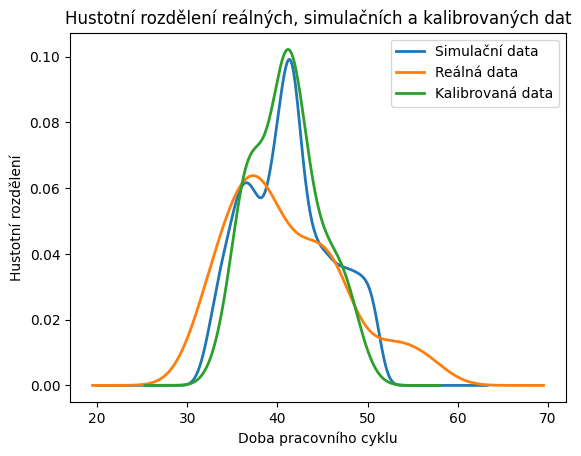

In [9]:
# Graf: Hustotní rozdělení reálných, simulačních a kalibrovaných dat
df_sim['total_time'].plot.density(bw_method='scott', linestyle='-', linewidth=2, label='Simulační data')
df_real['total_time'].plot.density(bw_method='scott', linestyle='-', linewidth=2, label='Reálná data')
df_real['total_time_calc'].plot.density(bw_method='scott', linestyle='-', linewidth=2, label='Kalibrovaná data')

plt.xlabel("Doba pracovního cyklu")
plt.ylabel("Hustotní rozdělení")
plt.title('Hustotní rozdělení reálných, simulačních a kalibrovaných dat')

plt.legend()
plt.show()

### KS test: jednostranný
Simulační data vs. normální rozdělení

In [10]:
### KS test: jednostranný (porovnání simulovaných dat s normálním rozdělením)

# Vzorek 1 – simulovaná data (deterministický model po kalibraci)
sample1 = df_sim['total_time'].to_numpy()

# Generování referenčního normálního rozdělení
np.random.seed(122)           # nastavení semene pro reprodukovatelnost
sample_size = 500             # velikost náhodného vzorku
mean = df_sim['total_time'].mean()
std_dev = df_sim['total_time'].std()

sample2 = np.random.normal(mean, std_dev, sample_size)

# Výpočet Kolmogorovova–Smirnovova testu (dvouvýběrový test)
ks_statistic, p_value = stats.ks_2samp(sample1, sample2)

print(f'Kolmogorov–Smirnovova statistika: {ks_statistic}')
print(f'P-hodnota: {p_value}')

# Testování na hladině významnosti α = 0.05
alpha = 0.05

if p_value < alpha:
    print("Zamítáme nulovou hypotézu. Vzorky pocházejí z různých rozdělení.")
else:
    print("Nezamítáme nulovou hypotézu. Není dostatek důkazů pro tvrzení, že rozdělení jsou odlišná.")

Kolmogorov–Smirnovova statistika: 0.05554999999999999
P-hodnota: 0.09475552301110246
Nezamítáme nulovou hypotézu. Není dostatek důkazů pro tvrzení, že rozdělení jsou odlišná.


### KS test: oboustranný
Simulační data vs. reálná data

In [11]:
### KS test: oboustranný (porovnání simulačních a reálných dat)

# Vzorek 1 – simulovaná data (deterministický model po kalibraci)
sample1 = df_sim['total_time'].to_numpy()

# Vzorek 2 – reálná měřená data
sample2 = df_real['total_time'].to_numpy()

# Výpočet oboustranného Kolmogorovova–Smirnovova testu
ks_statistic, p_value = stats.ks_2samp(sample1, sample2)

print(f'Kolmogorov–Smirnovova statistika: {ks_statistic}')
print(f'P-hodnota: {p_value}')

# Testování na hladině významnosti α = 0.05
alpha = 0.05

if p_value < alpha:
    print("Zamítáme nulovou hypotézu. Vzorky pocházejí z různých rozdělení.")
else:
    print("Nezamítáme nulovou hypotézu. Není dostatek důkazů pro tvrzení, že rozdělení jsou odlišná.")

Kolmogorov–Smirnovova statistika: 0.1811179245283019
P-hodnota: 0.0017402036207236904
Zamítáme nulovou hypotézu. Vzorky pocházejí z různých rozdělení.


### KS test: oboustranný
Simulační data vs. kalibrovaná data

In [12]:
### KS test: oboustranný (porovnání simulačních a kalibrovaných dat)

# Vzorek 1 – simulovaná data (deterministický model po kalibraci)
sample1 = df_sim['total_time'].to_numpy()

# Vzorek 2 – reálná měřená data
sample2 = df_real['total_time_calc'].to_numpy()

# Výpočet oboustranného Kolmogorovova–Smirnovova testu
ks_statistic, p_value = stats.ks_2samp(sample1, sample2)

print(f'Kolmogorov–Smirnovova statistika: {ks_statistic}')
print(f'P-hodnota: {p_value}')

# Testování na hladině významnosti α = 0.05
alpha = 0.05

if p_value < alpha:
    print("Zamítáme nulovou hypotézu. Vzorky pocházejí z různých rozdělení.")
else:
    print("Nezamítáme nulovou hypotézu. Není dostatek důkazů pro tvrzení, že rozdělení jsou odlišná.")

Kolmogorov–Smirnovova statistika: 0.08858018867924529
P-hodnota: 0.3609793007224703
Nezamítáme nulovou hypotézu. Není dostatek důkazů pro tvrzení, že rozdělení jsou odlišná.


### Monte Carlo Validation: Opakované podvzorkování na velikost reality

In [13]:
# Bootstrap vzorkování ze simulace na velikost reálného datasetu
n_real = len(df_real)

sim_samples = []

for _ in range(1000):
    sample = df_sim.sample(n=n_real, replace=True, random_state=122 + _)
    sim_samples.append(sample['total_time'])

### KS test pro každé podvzorkování (Reálná data)

In [14]:
# Výpočet KS p-hodnot pro porovnání reálných a simulovaných dat
p_vals = []

for s in sim_samples:
    _, p = ks_2samp(df_real['total_time'], s)
    p_vals.append(p)

### Pravděpodobnost shody modelu

In [15]:
valid_ratio = np.mean(np.array(p_vals) > 0.05)

print("Podíl validních simulací (Reálná data):", valid_ratio)

Podíl validních simulací (Reálná data): 0.451


### Distribuce KS p-hodnoty (Reálná data)

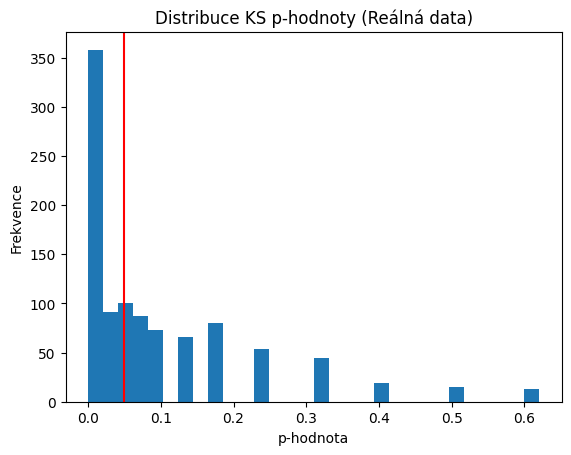

In [16]:
plt.figure()
plt.hist(p_vals, bins=30)
plt.axvline(0.05, color='red')

plt.title("Distribuce KS p-hodnoty (Reálná data)")
plt.xlabel("p-hodnota")
plt.ylabel("Frekvence")
plt.show()

### KS test pro každé podvzorkování (Kalibrovaná data)

In [17]:
# Výpočet KS p-hodnot pro porovnání reálných a simulovaných dat
p_vals = []

for s in sim_samples:
    _, p = ks_2samp(df_real['total_time_calc'], s)
    p_vals.append(p)

### Pravděpodobnost shody modelu

In [18]:
valid_ratio = np.mean(np.array(p_vals) > 0.05)

print("Podíl validních simulací (Kalibrovaná data):", valid_ratio)

Podíl validních simulací (Kalibrovaná data): 0.983


### Distribuce KS p-hodnoty (Kalibrovaná data)

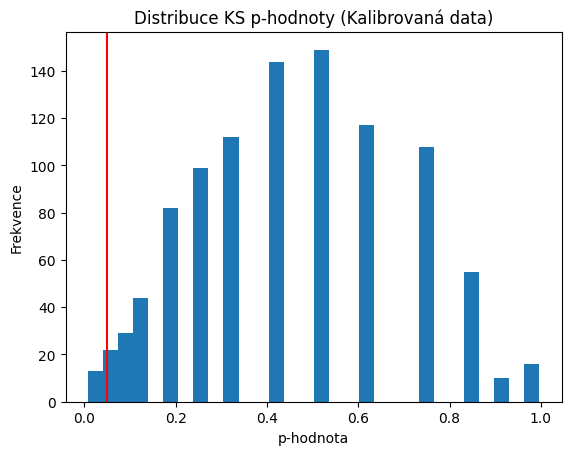

In [19]:
plt.figure()
plt.hist(p_vals, bins=30)
plt.axvline(0.05, color='red')

plt.title("Distribuce KS p-hodnoty (Kalibrovaná data)")
plt.xlabel("p-hodnota")
plt.ylabel("Frekvence")
plt.show()

### Porovnání průměru a směrodatné odchylky

In [20]:
# Porovnání simulovaných a reálných dat

# Výpočet průměrných hodnot
mean_sim = df_sim['total_time'].mean()
mean_real = df_real['total_time'].mean()

# Výpočet směrodatných odchylek
std_sim = df_sim['total_time'].std()
std_real = df_real['total_time'].std()

# Relativní odchylka průměrů
mean_diff = abs(mean_sim - mean_real) / abs(mean_real)

# Poměr směrodatných odchylek
std_ratio = std_sim / std_real

# Relativní odchylka směrodatných odchylek
std_diff_rela = abs(std_sim - std_real) / abs(std_real)

print(f'Relativní odchylka průměrů: {mean_diff * 100:.2f}%')
print(f'Poměr směrodatných odchylek: {std_ratio:.4f}')
print(f'Relativní odchylka směrodatných odchylek: {std_diff_rela * 100:.2f}%')

alpha = 0.05

if mean_diff > alpha:
    print('Relativní odchylka průměrů přesahuje zvolenou hranici α.')
else:
    print('Relativní odchylka průměrů nepřesahuje zvolenou hranici α.')

Relativní odchylka průměrů: 0.46%
Poměr směrodatných odchylek: 0.7481
Relativní odchylka směrodatných odchylek: 25.19%
Relativní odchylka průměrů nepřesahuje zvolenou hranici α.


In [21]:
# Porovnání simulovaných a kalibrovaných dat

# Výpočet průměrných hodnot
mean_sim = df_sim['total_time'].mean()
mean_real = df_real['total_time_calc'].mean()

# Výpočet směrodatných odchylek
std_sim = df_sim['total_time'].std()
std_real = df_real['total_time_calc'].std()

# Relativní odchylka průměrů
mean_diff = abs(mean_sim - mean_real) / abs(mean_real)

# Poměr směrodatných odchylek
std_ratio = std_sim / std_real

# Relativní odchylka směrodatných odchylek
std_diff_rela = abs(std_sim - std_real) / abs(std_real)

print(f'Relativní odchylka průměrů: {mean_diff * 100:.2f}%')
print(f'Poměr směrodatných odchylek: {std_ratio:.4f}')
print(f'Relativní odchylka směrodatných odchylek: {std_diff_rela * 100:.2f}%')

alpha = 0.05

if mean_diff > alpha:
    print('Relativní odchylka průměrů přesahuje zvolenou hranici α.')
else:
    print('Relativní odchylka průměrů nepřesahuje zvolenou hranici α.')

Relativní odchylka průměrů: 0.46%
Poměr směrodatných odchylek: 1.2605
Relativní odchylka směrodatných odchylek: 26.05%
Relativní odchylka průměrů nepřesahuje zvolenou hranici α.


### Parametrické porovnání dat

In [22]:
def parametric_verification(
    s1: pd.Series,
    s2: pd.Series,
    alpha: float = 0.05,
    equal_var_test: str = "levene",
    normality_test: str = "shapiro"
):
    """
    Parametrická verifikace dvou datových souborů (pandas Series).

    Testuje:
        1) normalitu rozdělení
        2) shodu rozptylů
        3) rozdíl středních hodnot (t-test)
        4) velikost efektu (Cohenovo d)

    Parametry:
        s1, s2 : porovnávané datové série
        alpha  : hladina významnosti
        equal_var_test : metoda testu shody rozptylů ("levene")
        normality_test : metoda testu normality ("shapiro")

    Návrat:
        dict s výsledky testů
    """

    result = {}

    # 1. Test normality (Shapiro-Wilk)
    if normality_test == "shapiro":
        n1 = stats.shapiro(s1)
        n2 = stats.shapiro(s2)

    result["normality"] = {
        "s1_p": n1.pvalue,
        "s2_p": n2.pvalue,
        "normal": (n1.pvalue > alpha) and (n2.pvalue > alpha)
    }

    # 2. Test shody rozptylů (Levene)
    if equal_var_test == "levene":
        var_test = stats.levene(s1, s2)

    result["variance"] = {
        "p_value": var_test.pvalue,
        "equal": var_test.pvalue > alpha
    }

    # 3. Dvouvýběrový t-test
    equal_var = result["variance"]["equal"]

    t = stats.ttest_ind(s1, s2, equal_var=equal_var)

    result["ttest"] = {
        "t_stat": t.statistic,
        "p_value": t.pvalue,
        "different_mean": t.pvalue < alpha
    }

    # 4. Velikost efektu (Cohenovo d)
    pooled_std = np.sqrt(
        ((s1.std() ** 2) + (s2.std() ** 2)) / 2
    )

    # ochrana proti dělení nulou
    if pooled_std == 0:
        cohen_d = 0
    else:
        cohen_d = (s1.mean() - s2.mean()) / pooled_std

    result["effect_size"] = {
        "cohen_d": cohen_d
    }

    return result

In [23]:
result = parametric_verification(df_sim['total_time'], df_real['total_time_calc'])
print(f"""
Normalita:
  s1 p-value: {result['normality']['s1_p']:.5f}
  s2 p-value: {result['normality']['s2_p']:.5f}
  Normalita splněna: {result['normality']['normal']}

Shoda rozptylů:
  p-value: {result['variance']['p_value']:.5f}
  Rozptyly shodné: {result['variance']['equal']}

T-test:
  t-statistika: {result['ttest']['t_stat']:.5f}
  p-value: {result['ttest']['p_value']:.5f}
  Rozdíl průměrů významný: {result['ttest']['different_mean']}

Velikost efektu:
  Cohen d: {result['effect_size']['cohen_d']:.4f}
""")


Normalita:
  s1 p-value: 0.00000
  s2 p-value: 0.09970
  Normalita splněna: False

Shoda rozptylů:
  p-value: 0.00223
  Rozptyly shodné: False

T-test:
  t-statistika: 0.50766
  p-value: 0.61274
  Rozdíl průměrů významný: False

Velikost efektu:
  Cohen d: 0.0435



c:\Users\Vjačeslav Usmanov\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:592: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20000.
  res = hypotest_fun_out(*samples, **kwds)


In [24]:
result = parametric_verification(df_sim['total_time'], df_real['total_time'])
print(f"""
Normalita:
  s1 p-value: {result['normality']['s1_p']:.5f}
  s2 p-value: {result['normality']['s2_p']:.5f}
  Normalita splněna: {result['normality']['normal']}

Shoda rozptylů:
  p-value: {result['variance']['p_value']:.5f}
  Rozptyly shodné: {result['variance']['equal']}

T-test:
  t-statistika: {result['ttest']['t_stat']:.5f}
  p-value: {result['ttest']['p_value']:.5f}
  Rozdíl průměrů významný: {result['ttest']['different_mean']}

Velikost efektu:
  Cohen d: {result['effect_size']['cohen_d']:.4f}
""")


Normalita:
  s1 p-value: 0.00000
  s2 p-value: 0.00011
  Normalita splněna: False

Shoda rozptylů:
  p-value: 0.00001
  Rozptyly shodné: False

T-test:
  t-statistika: 0.30213
  p-value: 0.76315
  Rozdíl průměrů významný: False

Velikost efektu:
  Cohen d: 0.0333



In [25]:
# Neparametrický Mann–Whitneyův U test (oboustranný)
# Testuje, zda se dvě nezávislé skupiny statisticky významně liší
# v centrální tendenci (mediánu).

stats.mannwhitneyu(
    df_sim['total_time'],
    df_real['total_time_calc'],
    alternative='two-sided'
)

MannwhitneyuResult(statistic=np.float64(1071152.0), pvalue=np.float64(0.8515793385227874))

In [26]:
# Neparametrický Mann–Whitneyův U test (oboustranný)
# Testuje, zda se dvě nezávislé skupiny statisticky významně liší
# v centrální tendenci (mediánu).

stats.mannwhitneyu(
    df_sim['total_time'],
    df_real['total_time'],
    alternative='two-sided'
)

MannwhitneyuResult(statistic=np.float64(1137262.0), pvalue=np.float64(0.1948652940712411))

### Vyhodnocení shody simulovaných a kalibrovaných dat

********
**Test normality (Shapiro–Wilk)**

s1 p-value = 0.00000

s2 p-value = 0.09970

Normalita splněna: False

*Interpretace*:

Simulační data (s1) nesplňují předpoklad normality.

Reálná data (s2) jsou na hranici (p ≈ 0,099), ale při α = 0,05 normalitu nelze zamítnout.

Celkově tedy nelze předpokládat normalitu obou souborů.

Parametrický t-test je zde metodicky hraniční, proto je vhodné použít i neparametrický test (Mann–Whitney)
********
**Shoda rozptylů (Levene)**

p-value = 0.00223

Rozptyly shodné: False

*Interpretace:*

Rozptyly obou souborů se statisticky významně liší.

To potvrzuje strukturální rozdíl variability mezi simulovanými a reálnými daty.
*******
**t-test (porovnání průměrů)**

t-statistika ≈ 0.50766

p-value = 0.61274

Rozdíl průměrů významný: False

*Interpretace:*

p ≫ 0,05 → nelze zamítnout nulovou hypotézu.

Průměrné hodnoty obou souborů jsou velmi podobné.

Kalibrace modelu byla velmi účinná.
********
**Velikost efektu (Cohen d)**

Cohen d = 0.0033

*Interpretace:*

Hodnota je prakticky nulová.

Efekt je zanedbatelný.
********
**Mann–Whitney U test (neparametrický)**

p-value ≈ 0.8515

*Interpretace:*

p ≫ 0,05 → nelze zamítnout nulovou hypotézu.

Mediány obou rozdělení se statisticky významně neliší.

Neparametrický test potvrzuje závěr t-testu.

### Autor / Organizace / Datum

Vjačeslav Usmanov, ČVUT v Praze, Fakulta stavební

###### Přehled změn


|  Datum (YYYY-MM-DD) |  Verze | Autor změny  |  Popis změny |
|---|---|---|---|
| 2026-01-25 | 1.1 | Vjačeslav Usmanov| added DM_03_Model_Verification.ipynb |
| 2026-02-14 | 1.2 | Vjačeslav Usmanov| changed DM_03_Model_Verification.ipynb |